<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/Stock_Basic_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic Statistics in Python**

**Statistical Analysis**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
market = '^GSPC'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
dfm = yf.download(market,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,110.953873,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,110.829704,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,111.393303,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,112.635139,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,113.666824,33561900


In [3]:
df.shape

(502, 6)

In [0]:
new_df = pd.DataFrame({symbol : df['Adj Close'], market : dfm['Adj Close']}, index=df.index)

# compute returns
new_df[['stock_returns','market_returns']] = new_df[[symbol,market]] / new_df[[symbol,market]].shift(1) -1
new_df = new_df.dropna()
covmat = np.cov(new_df["stock_returns"],new_df["market_returns"])

# calculate measures now
beta = covmat[0,1]/covmat[1,1]
alpha= np.mean(new_df["stock_returns"])-beta*np.mean(new_df["market_returns"])

In [5]:
print('Beta:', beta)
print('Alpha:', alpha)

Beta: 1.2747501239751715
Alpha: 0.00047677562553171256


In [0]:
close = df['Adj Close']

**Mean is the average**

In [7]:
mean = np.mean(close)
mean

165.063559314741

**Median is the value of middlemost value**

In [8]:
median = np.median(close)
median

164.1116255

**Mode is the most frequent value**

In [9]:
mode = stats.mode(close)
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 114.631653 with a count of 2


**Range is a measure of how spread apart the values are**

In [10]:
range_of_stock = np.ptp(close)
range_of_stock

117.010094

**Variance is a measure of how variable the data is**

In [11]:
variance = np.var(close)
variance

716.5910365272126

**Standard deviation is the square root of the variance and is measure how the data is spread out**

In [12]:
standard_deviation = np.std(close)
standard_deviation

26.769218078367786

**Standard error is the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population**

In [13]:
standard_error = stats.sem(close)
standard_error

1.195960463474456

**Z-Scores measure how many standard deviations an element is from the mean**

In [14]:
z = np.abs(stats.zscore(close))
print(z)

[2.02133981 2.02597831 2.00492432 1.95853387 1.9199939  1.91571137
 1.89287327 1.91071608 1.91820976 1.88395142 1.8843088  1.89180249
 1.88395142 1.88109709 1.88502246 1.8168638  1.81472254 1.81436545
 1.82578565 1.83577765 1.57170711 1.57955732 1.55993067 1.51675137
 1.47250301 1.45430252 1.42025479 1.43100722 1.3890751  1.32707086
 1.30950935 1.31524426 1.30198175 1.26685932 1.2521661  1.27295273
 1.2682929  1.25861694 1.2564657  1.15611443 1.18586282 1.1564741
 1.17224352 1.16579152 1.18442923 1.19589733 1.17941025 1.17726133
 1.18478606 1.13210151 1.1238597  1.14894653 1.09626195 1.15432346
 1.09769614 1.11561676 1.12565123 1.11704919 1.01239716 1.00092854
 1.00773845 1.01741441 1.01598083 0.97763156 1.00451221 1.01741441
 1.02888363 1.03497593 1.0901691  1.0840774  1.11095517 1.08300176
 1.10558053 1.12421824 1.06113837 1.06723182 1.01813035 0.9862336
 1.01669792 1.01275626 1.01777352 0.91276182 0.87943037 0.89555886
 0.91455452 0.82746344 0.68231146 0.64718959 0.67335147 0.625848

**Contingency Table shows correlations between two variables**

In [15]:
data_crosstab = pd.crosstab(df['High'], 
                            df['Low'],  
                               margins = False) 
print(data_crosstab)

Low         114.760002  115.750000  ...  226.729996  229.779999
High                                ...                        
116.330002           1           0  ...           0           0
116.510002           0           1  ...           0           0
116.860001           0           0  ...           0           0
118.160004           0           0  ...           0           0
119.300003           0           0  ...           0           0
...                ...         ...  ...         ...         ...
229.419998           0           0  ...           0           0
229.669998           0           0  ...           0           0
230.000000           0           0  ...           0           0
232.350006           0           0  ...           1           0
233.470001           0           0  ...           0           1

[482 rows x 484 columns]


**Scatter plot shows two variables that plot along two axes and it shows correlation or not**

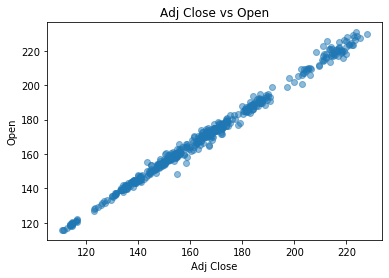

In [16]:
plt.scatter(df['Adj Close'], df['Open'], alpha=0.5)
plt.title('Adj Close vs Open')
plt.xlabel('Adj Close')
plt.ylabel('Open')
plt.show()

**Regression is a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables**

In [17]:
from sklearn.linear_model import LinearRegression

X = np.array(df['Open']).reshape(502,-1)
y = np.array(df['Adj Close'])
LR = LinearRegression().fit(X, y)
LR.score(X, y)

0.9939509732897176

In [18]:
LR.coef_

array([1.01490443])

In [19]:
LR.intercept_

-7.245054411785475

In [20]:
LR.predict(X)

array([110.28088122, 110.33162137, 110.40266468, 111.2754835 ,
       112.46291965, 113.29514128, 113.26469516, 113.42708393,
       113.64021284, 112.85873136, 114.54347677, 113.93453614,
       115.00018071, 114.54347677, 114.08677282, 114.96973459,
       116.23836513, 116.71537122, 115.48733788, 115.71061889,
       121.67825387, 122.64241713, 122.97733052, 123.80955925,
       125.24056232, 126.0626481 , 126.36710724, 127.18919302,
       127.81842869, 128.2142404 , 130.29479752, 130.4470271 ,
       129.86853969, 131.01537155, 131.21834939, 132.18252077,
       130.69061025, 131.93893762, 131.8780464 , 132.70011594,
       134.84156529, 133.60338088, 134.20217043, 133.8875531 ,
       133.7759126 , 133.56279079, 134.08038697, 133.67443129,
       134.13113524, 134.24277574, 135.5722975 , 135.85646972,
       135.24752098, 136.98301465, 134.68933572, 136.1203398 ,
       136.36392193, 134.22247258, 135.76513238, 138.57640648,
       139.09401687, 138.61701078, 138.60686782, 138.14

**Elementary Probability Theory the outcome that could happen**

**Monte Carlo method is an experimentals of computational algorithms that rely on repeated random samples.** 

In [0]:
df['Returns'] = df['Adj Close'].pct_change()
df['Returns'] = df['Returns'].dropna()

In [0]:
values = []
S = df['Returns'][-1] #Starting stock price 
T = 252 #Number of trading days
mu = df['Returns'].mean() #Mean
sigma = df['Returns'].std()*math.sqrt(252) #Volatility

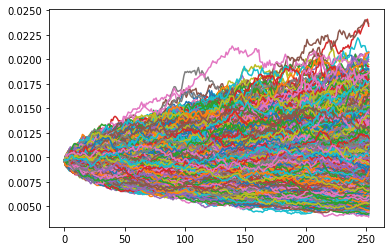

In [23]:
for i in range(10000):
    # Create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,sigma/math.sqrt(T),T)+1
    
    # Set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    # Plot the data
    plt.plot(price_list)
plt.show()

**Random variables and probability distributions**
https://www.investopedia.com/articles/06/probabilitydistribution.asp

**Cumulative Distribution**

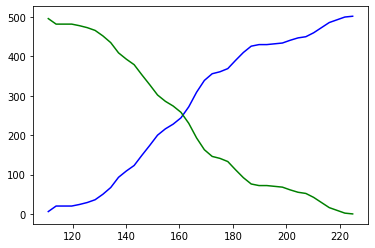

In [24]:
data = df['Adj Close']
values, base = np.histogram(data, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
#plot the survival function
plt.plot(base[:-1], len(data)-cumulative, c='green')

plt.show()

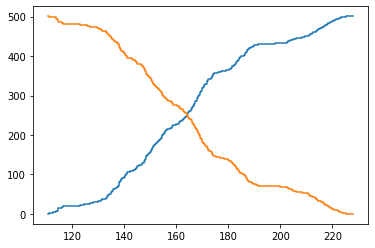

In [25]:
sorted_data = np.sort(data)  # Or data.sort(), if data can be modified

# Cumulative counts:
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1
plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

plt.show()

**Probability Density Function**

**Probability Density Function (PDF) is continuous random variable and have value that is given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample. (Wikipedia)**

Text(0.5, 1.0, 'Probability Density Function')

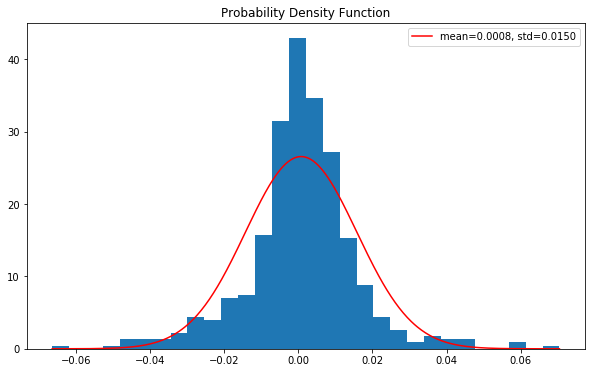

In [26]:
values = df['Returns'][1:]
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')
ax.set_title("Probability Density Function")

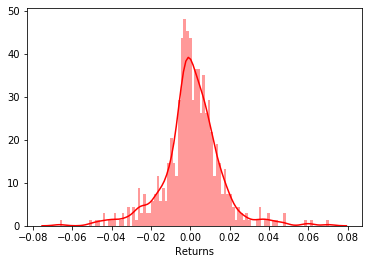

In [27]:
sns.distplot(df['Returns'].dropna(),bins=100,color='red')

**Cumulative Probability Distribution**

Text(0.5, 1.0, 'Cumulative Probability Distribution')

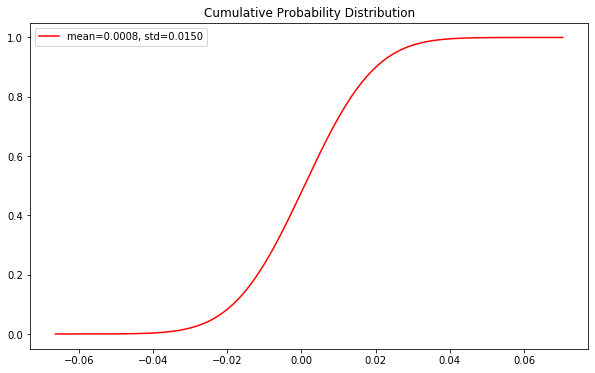

In [28]:
values = df['Returns'][1:]
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
#ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')
ax.set_title("Cumulative Probability Distribution")

**Binomial Distribution**

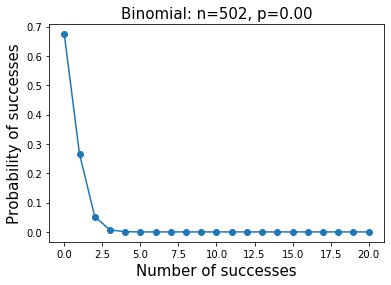

In [29]:
from scipy.stats import binom

n = len(df['Returns'])
p = df['Returns'].mean()
k = np.arange(0,21)
binomial = binom.pmf(k,n,p)

plt.plot(k, binomial, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()

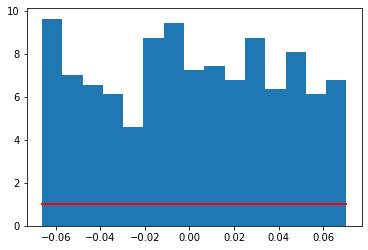

In [30]:
s = np.random.uniform(values.min(), values.max(), len(values))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

Mean: 0.395400
SD: 0.624418


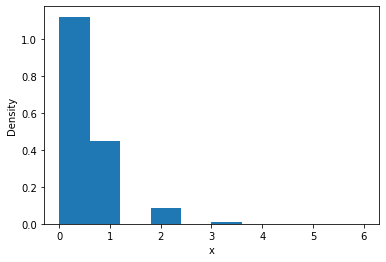

In [31]:
binom_sim = binom.rvs(n = n, p = p, size=10000)
print("Mean: %f" % np.mean(binom_sim))
print("SD: %f" % np.std(binom_sim, ddof=1))
plt.hist(binom_sim, bins = 10, normed = True)
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

**Poisson Distribution**

In [32]:
rate = 3 # Error Rate
n = np.arange(0,10) # Number of Trials
y = stats.poisson.pmf(n, rate)
y

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ])

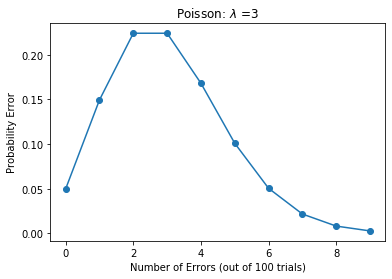

In [33]:
plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ =%i' % rate)
plt.ylabel('Probability Error')
plt.xlabel('Number of Errors (out of 100 trials)')
plt.show()

Mean: 3.170000
Standard Deviation: 1.891261


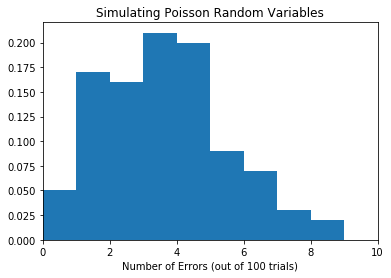

In [34]:
data = stats.poisson.rvs(mu=3, loc=0, size=100)
print("Mean: %f" % np.mean(data))
print("Standard Deviation: %f" % np.std(data, ddof=1))

plt.hist(data, bins = 9, normed = True)
plt.xlim(0,10)
plt.xlabel('Number of Errors (out of 100 trials)')
plt.title('Simulating Poisson Random Variables')
plt.show()

**Beta Distribution**

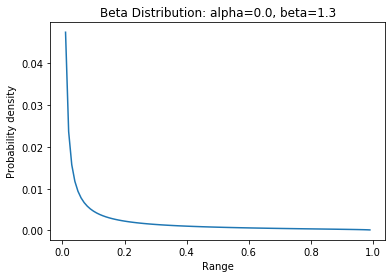

In [35]:
alpha = alpha
beta = beta
x = np.arange(0, 1, 0.01)
y = stats.beta.pdf(x, alpha, beta)
plt.plot(x, y)
plt.title('Beta Distribution: alpha=%.1f, beta=%.1f' % (alpha,beta))
plt.xlabel('Range')
plt.ylabel('Probability density')
plt.show()

**Exponential Distribution**

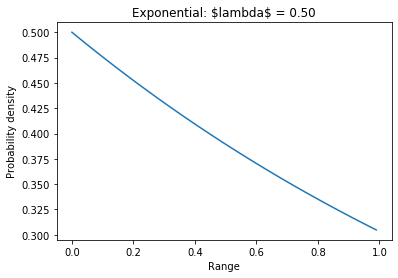

In [36]:
lambd = 0.5 # lambda
x = np.arange(0, 1, 0.01)
y = lambd * np.exp(-lambd * x)
plt.plot(x, y)
plt.title('Exponential: $lambda\$ = %.2f' % lambd)
plt.xlabel("Range")
plt.ylabel("Probability density")
plt.show()

**Lognormal Distribution**

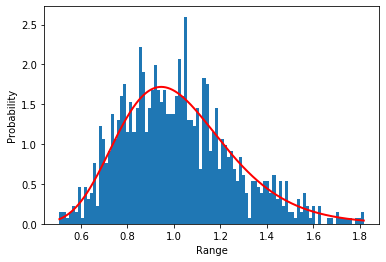

In [37]:
from scipy.stats import lognorm

s = np.random.lognormal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.axis('tight')
plt.show()